In [19]:
import sys
sys.path.append("./tools")

In [20]:
import numpy as np

import qiskit
from qiskit import QuantumCircuit
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
palette = {
    'unitary': '#FF9966', 'vqc': '#66CC99', 
}

In [5]:
%matplotlib inline

In [126]:
%%html
<style>
table {float:left;}
</style>

## Tool Modules

In [6]:
from quantum import *
from measurements import *

from unitary import *
from VQC import *

from dataSL import *
from QOLearner import *

from noise import *
from lipschitz import *

## Prepare Circuits

### - Input Circuits

In [7]:
n = 2

In [9]:
def getInputCircuit(n):
    circuit = QuantumCircuit(2 * n, 2 * n)
    
    for i in range(n):
        circuit.h(i)
        circuit.cx(i, n + i)
    circuit.barrier()
    
    return circuit

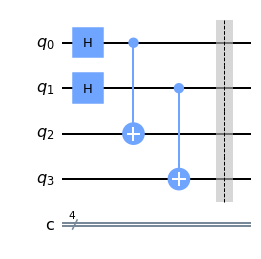

In [10]:
inputCircuit = getInputCircuit(n)
inputCircuit.draw(output='mpl')

### - Output Circuits

In [11]:
# empty output citcuit
afterCircuit = QuantumCircuit(2 * n, 2 * n)

## Train paramters

In [12]:
import time
import sys
stdout = sys.stdout

In [13]:
# experiments times
MAX_TIMES = 10

### - expecetd

In [145]:
# expected = {'0000':1, '0101':1, '0010':1, '0111':1, '1000':1, '1101':1, '1010':1, '1111':1}
expected = {'0000':1, '0101':1, '0011':1, '0110':1, '1000':1, '1101':1, '1011':1, '1110':1}

## Strategy: unitary

In [146]:
qol_unitary = QOLearnerBase([inputCircuit, afterCircuit], 2, [2, 3], expected)

In [202]:
times_unitary = []

for i in range(MAX_TIMES):
    sys.stdout = None
    start = time.clock()
    qol_unitary.fit(epoch=1000, strategy='unitary', stepsize=0.003, early_stopping=True)
    end = time.clock()
    times_unitary.append(end - start)
    sys.stdout = stdout
    print(f'Fin - No. {i + 1}')
    
    saveParams(qol_unitary.params[-1], 'sqt', 'unitary', i + 1)
    saveLosses(qol_unitary.losses, 'sqt', 'unitary', i + 1)

Fin - No. 1
Fin - No. 2
Fin - No. 3
Fin - No. 4
Fin - No. 5
Fin - No. 6
Fin - No. 7
Fin - No. 8
Fin - No. 9
Fin - No. 10


In [203]:
print(f'Average times for unitary: {np.mean(times_unitary)}')

Average times for unitary: 7.957370939996326


### - plot a loss example

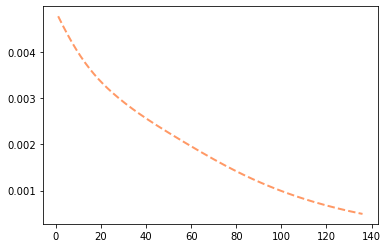

In [204]:
plot(loadLosses('sqt', 'unitary', 7), color=palette['unitary'])

In [205]:
losses_unitary= []
max_length = 0
for i in range(MAX_TIMES):
    losses_unitary.append(loadLosses('sqt', 'unitary', i + 1))
    max_length = max(max_length, len(losses_unitary[-1]))

for i in range(MAX_TIMES):
    length = len(losses_unitary[i])
    while length < max_length:
        losses_unitary[i].append(losses_unitary[i][-1])
        length += 1

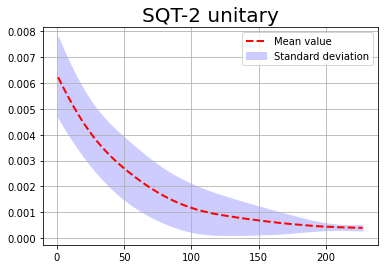

In [206]:
plotLosses(losses_unitary, title='SQT-2 unitary')

### - average time and loss

In [207]:
average_loss_unitary = 0.0
for i in range(MAX_TIMES):
    loss = loadLosses('sqt', 'unitary', i + 1)[-1]
    average_loss_unitary += loss
print(f'Average loss for unitary: {average_loss_unitary / MAX_TIMES}')

Average loss for unitary: (0.0003919549612769028+0j)


In [208]:
average_epoch_unitary = 0
for i in range(MAX_TIMES):
    loss = loadLosses('sqt', 'unitary', i + 1)
    average_epoch_unitary += len(loss)
print(f'Average epoch for unitary: {average_epoch_unitary / MAX_TIMES}')

Average epoch for unitary: 135.6


In [209]:
average_time_unitary = 7.957370939996326

In [210]:
average_time_per_epoch_unitary = average_time_unitary / average_epoch_unitary
print(f'Average time per epoch for unitary: {average_time_per_epoch_unitary}')

Average time per epoch for unitary: 0.005868267654864547


|Strategy| parameterized unitary |
|:----------------:|:-----:|
| Average loss | 3.920e-4 |
| Average time | 7.957 |
| Average epochs | 135.6 |
| Average time per epoch | 0.00587 |

## Strategy: VQC

In [164]:
qol_vqc = QOLearnerBase([inputCircuit, afterCircuit], 2, [2, 3], expected)

In [199]:
times_vqc = []

for i in range(MAX_TIMES):
    sys.stdout = None
    start = time.clock()
    qol_vqc.fit(epoch=1000, strategy='vqc', stepsize=0.003, early_stopping=True)
    end = time.clock()
    times_vqc.append(end - start)
    sys.stdout = stdout
    print(f'Fin - No. {i + 1}')
    
    saveParams(qol_vqc.params[-1], 'sqt', 'vqc', i + 1)
    saveLosses(qol_vqc.losses, 'sqt', 'vqc', i + 1)

Fin - No. 1
Fin - No. 2
Fin - No. 3
Fin - No. 4
Fin - No. 5
Fin - No. 6
Fin - No. 7
Fin - No. 8
Fin - No. 9
Fin - No. 10


In [211]:
print(f'Average times for vqc: {np.mean(times_vqc)}')

Average times for vqc: 8.171870459988714


### - plot a loss example

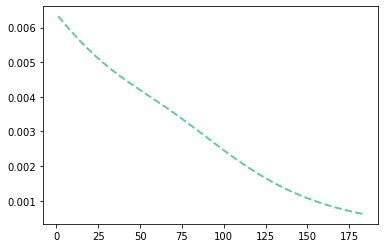

In [201]:
plot(loadLosses('sqt', 'vqc', 1), color=palette['vqc'])

In [214]:
losses_vqc= []
max_length = 0
for i in range(10):
    losses_vqc.append(loadLosses('sqt', 'vqc', i + 1))
    max_length = max(max_length, len(losses_vqc[-1]))

for i in range(10):
    length = len(losses_vqc[i])
    while length < max_length:
        losses_vqc[i].append(losses_vqc[i][-1])
        length += 1

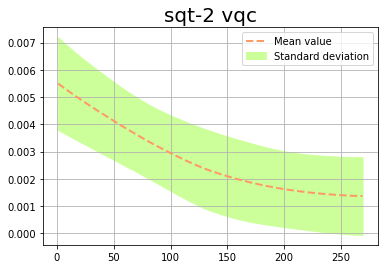

In [215]:
plotLosses(losses_vqc, color="#FF9966", fill_color="#CCFF99", title="sqt-2 vqc")

### - average time and loss

In [216]:
average_loss_vqc = 0.0
for i in range(MAX_TIMES):
    loss = loadLosses('sqt', 'vqc', i + 1)[-1]
    average_loss_vqc += loss
print(f'Average loss for vqc: {average_loss_vqc / MAX_TIMES}')

Average loss for vqc: (0.0013634596422480683+0j)


In [217]:
average_epoch_vqc = 0
for i in range(MAX_TIMES):
    loss = loadLosses('sqt', 'vqc', i + 1)
    average_epoch_vqc += len(loss)
print(f'Average epoch for vqc: {average_epoch_vqc / MAX_TIMES}')

Average epoch for vqc: 164.6


In [133]:
average_time_vqc = 8.171870459988714

In [218]:
average_time_per_epoch_vqc = average_time_vqc / average_epoch_vqc
print(f'Average time per epoch for vqc: {average_time_per_epoch_vqc}')

Average time per epoch for vqc: 0.003045562545565119


| Strategy | VQC |
|:----------------:|:-----:|
| Average loss | 1.363e-3 |
| Average time | 8.172 |
| Average epochs | 164.6 |
| Average time per epoch | 0.00305 |

##  Summarize

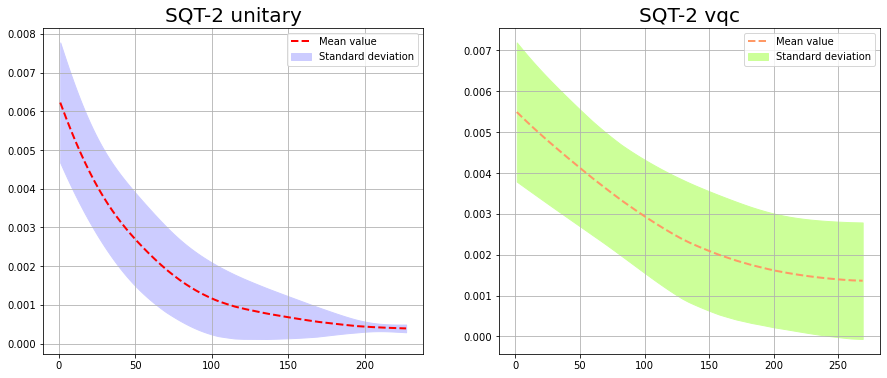

In [219]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plotLosses(losses_unitary, title="SQT-2 unitary")
plt.subplot(1,2,2)
plotLosses(losses_vqc, color="#FF9966", fill_color="#CCFF99", title="SQT-2 vqc")

|Strategy| parameterized unitary | VQC |
|:----------------:|:-----:| :-----:|
| Average loss | 3.8012e-4 | 1.558e-3 |
| Average time | 4.636 | 5.013 |
| Average epochs | 74.0 |93.8 |
| Average time per epoch | 0.00627 | 0.00534 |

## Compare Lipschitz

In [117]:
measurements = getMeasurements(4)

In [102]:
names = ['unitary', 'vqc']

In [136]:
error_params = [
    [0.0001 , 'b'], [0.0001 , 'p'], [0.0001 , 'd'], 
    [0.001 , 'b'], [0.001 , 'p'], [0.001 , 'd'], 
    [0.01 , 'b'], [0.01 , 'p'], [0.01 , 'd'],
    [0.1 , 'b'], [0.1 , 'p'], [0.1 , 'd'], 
]

### - exact Lipschitz

In [221]:
smallestDict = { k: 0 for k in names }

for (p, errorType) in error_params:
    print(f' - p = {p}, errorType: {errorType}')
    
    # simulate noise input circuits
    noiseInputCircuits = getNoiseCircuits([inputCircuit], p, errorType)

    smallest = 1.0; smallestKey = ''
    for name in names: # unitary or vqc
        lip = 0.0
        
        for i in range(MAX_TIMES):
            # build targetCircuit
            params = loadParams('sqt', name, i + 1)
            targetCircuit = QuantumCircuit(4, 4)
            
            if name == 'unitary':
                targetCircuit.append(buildU(2, params), [2, 3])
            else:
                targetCircuit = getVQCCircuit(targetCircuit, 2, params, [2, 3])
                
            lip += calculateExactLipschitz(
                [inputCircuit], noiseInputCircuits, 
                targetCircuit, afterCircuit, measurements
            )
        lip = lip / MAX_TIMES
        
        if lip < smallest:
            smallest = lip
            smallestKey = name
        
        print(f'Lipschitz for [{name}] is: {lip}\n')
    
    smallestDict[smallestKey]  += 1.0
    print(f'smallest one: [{smallestKey}]')
        
    print('-' * 25)
    print()

print(smallestDict)

 - p = 0.0001, errorType: b
Lipschitz for [unitary] is: 0.019502582250969017

Lipschitz for [vqc] is: 0.015503883173596727

smallest one: [vqc]
-------------------------

 - p = 0.0001, errorType: p
Lipschitz for [unitary] is: 2.7765291431773525e-14

Lipschitz for [vqc] is: 2.0823968573830138e-14

smallest one: [vqc]
-------------------------

 - p = 0.0001, errorType: d
Lipschitz for [unitary] is: 0.007800958765075057

Lipschitz for [vqc] is: 0.006201703570515861

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: b
Lipschitz for [unitary] is: 0.019522945680883134

Lipschitz for [vqc] is: 0.015513794759098318

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: p
Lipschitz for [unitary] is: 3.0870249440328284e-14

Lipschitz for [vqc] is: 2.4182662508001518e-14

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: d
Lipschitz for [unitary] is: 0.007808440275426922

Lipschitz for [vqc] is: 0.006207022936005698

smallest one: [v

<table>
    <tr>
        <th style="text-align: center" rowspan="2">Strategy</th><th rowspan="2">Error Type</th><th style="text-align: center" colspan="4">Probability</th>
    </tr>
    <tr>
                                                 <td style="text-align: center">0.0001</td><td style="text-align: center">0.001</td><td style="text-align: center">0.01</td><td style="text-align: center">0.1</td>
    </tr>
    <tr>
        <td style="text-align: center" rowspan="3">PUG</td><td style="text-align: center">bit flip</td><td>0.02417</td><td>0.02419</td><td> 0.02435</td><td>0.02590</td>
    </tr>
    <tr>
        <td style="text-align: center">phase flip</td><td>2.661e-14</td><td>3.2727e-14</td><td>2.6346e-15</td><td>2.8503e-16</td>
    </tr>
    <tr>
        <td style="text-align: center">depolarizing</td><td>9.670e-3</td><td>9.678e-3</td><td>9.762e-3</td><td>0.01064</td>
    </tr>
    <tr>
        <td style="text-align: center" rowspan="3">VQC</td><td style="text-align: center">bit flip</td><td> 0.01299</td><td>0.01300</td><td>0.01312</td><td>0.01429</td>
    </tr>
    <tr>
        <td style="text-align: center">phase flip</td><td>2.0535e-14</td><td>2.3066e-14</td><td>1.8472e-15</td><td>2.0122e-16</td>
    </tr>
    <tr>
        <td style="text-align: center">depolarizing</td><td>5.195e-3</td><td>5.200e-3</td><td>5.248e-3</td><td>5.758e-3</td>
    </tr>
    
</table>

### - approximate Lipschitz

In [220]:
for name in names: # unitary or vqc
    lip = 0.0
    best_index = -1; best_lip = 1

    for i in range(MAX_TIMES):
        # build targetCircuit
        params = loadParams('sqt', name, i + 1)
        targetCircuit = QuantumCircuit(4, 4)

        if name == 'unitary':
            targetCircuit.append(buildU(2, params), [2, 3])
        else:
            targetCircuit = getVQCCircuit(targetCircuit, 2, params, [2, 3])

        score = calculateLipschitz(targetCircuit, afterCircuit, measurements)
        
        if score < best_lip:
            best_lip = score
            best_index = i + 1
        
        lip += score
                                  
    lip = lip / MAX_TIMES

    print(f'Lipschitz for [{name}] is: {lip}(best params: No.{best_index}({best_lip}))\n')

Lipschitz for [unitary] is: 0.1892780508481408(best params: No.4(0.1351750120594854))

Lipschitz for [vqc] is: 0.1486665784301189(best params: No.2(0.030875003749702114))



In [234]:
rou = getDensityMatrix(inputCircuit)

In [235]:
X = np.matrix([[0,1],[1,0]])
I = np.eye(2)
X = Kron(X, I, I, I)

In [236]:
r = rou - X @ rou @ Dag(X)